<a href="https://colab.research.google.com/github/Annie1710/eindopdracht/blob/main/Eindopdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please formulate an answer to the following three questions in your report.

1.  What is the biggest predictor of a large CO2 output per capita of a country?
2.  Which countries are making the biggest strides in decreasing CO2 output?
3.  Which non-fossil fuel energy technology will have the best price in the future?




# Voorbereiding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.impute import SimpleImputer
%load_ext google.colab.data_table

## Vraag 1

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/owid-co2-data.csv') # df met info over co2 per capita en per gdp
df1.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.7,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

In [ ]:
df1=df1.rename(columns={'primary_energy_consumption': 'pec',}) # namen korter. '
df1.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.7,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2=df1[['country', 'year', 'population', 'gdp', 'co2_per_capita', 'pec']]
df2.head()

,country,year,population,gdp,co2_per_capita,pec
0,Afghanistan,1949,7624058.0,NaN,0.002,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.011,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.012,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.012,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.013,NaN


In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/land-area-km.csv') # df met info over bevolkingsdichtheid
df3.head()

,Entity,Code,Year,Land area (sq. km)
0,Afghanistan,AFG,1961,652860.0
1,Afghanistan,AFG,1962,652860.0
2,Afghanistan,AFG,1963,652860.0
3,Afghanistan,AFG,1964,652860.0
4,Afghanistan,AFG,1965,652860.0


In [ ]:
df3.columns

Index(['Entity', 'Code', 'Year', 'Land area (sq. km)'], dtype='object')

In [ ]:
df3=df3.rename(columns={'Entity': 'country', 'Year': 'year'}) # namen corrigeren. '
df3.head()

,country,Code,year,Land area (sq. km)
0,Afghanistan,AFG,1961,652860.0
1,Afghanistan,AFG,1962,652860.0
2,Afghanistan,AFG,1963,652860.0
3,Afghanistan,AFG,1964,652860.0
4,Afghanistan,AFG,1965,652860.0


In [ ]:
df4 = pd.merge(df2, df3, how="outer", on=['country','year']) # beide df samenvoegen
df4.head()

,country,year,population,gdp,co2_per_capita,pec,Code,Land area (sq. km)
0,Afghanistan,1949,7624058.0,NaN,0.002,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.011,NaN,NaN,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.012,NaN,NaN,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.012,NaN,NaN,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.013,NaN,NaN,NaN


In [ ]:
df4['gdp_per_capita']=df4['gdp']/df4['population'] # gdp per capita berekenen
df4.head()

,country,year,population,gdp,co2_per_capita,pec,Code,Land area (sq. km),gdp_per_capita
0,Afghanistan,1949,7624058.0,NaN,0.002,NaN,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.011,NaN,NaN,NaN,1215.332543
2,Afghanistan,1951,7840151.0,9.692280e+09,0.012,NaN,NaN,NaN,1236.236369
3,Afghanistan,1952,7935996.0,1.001733e+10,0.012,NaN,NaN,NaN,1262.264378
4,Afghanistan,1953,8039684.0,1.063052e+10,0.013,NaN,NaN,NaN,1322.255925


In [ ]:
df4['pec_per_capita']=df4['pec']/df4['population'] # primary_energy_consumption per capita berekenen
df4.head()

,country,year,population,gdp,co2_per_capita,pec,Code,Land area (sq. km),gdp_per_capita,pec_per_capita
0,Afghanistan,1949,7624058.0,NaN,0.002,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.011,NaN,NaN,NaN,1215.332543,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.012,NaN,NaN,NaN,1236.236369,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.012,NaN,NaN,NaN,1262.264378,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.013,NaN,NaN,NaN,1322.255925,NaN


In [ ]:
df4['km2_per_capita']=df4['Land area (sq. km)']/df4['population'] # bevolkingsdichtheid berekenen
df4.head()

,country,year,population,gdp,co2_per_capita,pec,Code,Land area (sq. km),gdp_per_capita,pec_per_capita,km2_per_capita
0,Afghanistan,1949,7624058.0,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.011,NaN,NaN,NaN,1215.332543,NaN,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.012,NaN,NaN,NaN,1236.236369,NaN,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.012,NaN,NaN,NaN,1262.264378,NaN,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.013,NaN,NaN,NaN,1322.255925,NaN,NaN


In [ ]:
df5 = pd.read_csv('/content/drive/MyDrive/dietary-compositions-by-commodity-group.csv') # df met info over dieet
df5.head()

,Entity,Code,Year,Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat (FAO (2017)) (kilocalories per person per day),Dairy & Eggs (FAO (2017)) (kilocalories per person per day),Fruit and Vegetables (FAO (2017)) (kilocalories per person per day),Starchy Roots (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Cereals and Grains (FAO (2017)) (kilocalories per person per day)
0,Afghanistan,AFG,1961,13,0.0,51,92,88,102,82,25,16,2530
1,Afghanistan,AFG,1962,12,0.0,45,98,88,101,76,22,17,2458
2,Afghanistan,AFG,1963,13,0.0,47,106,91,110,79,23,17,2212
3,Afghanistan,AFG,1964,11,0.0,55,102,93,110,95,24,18,2445
4,Afghanistan,AFG,1965,13,0.0,57,105,95,118,95,24,18,2431


In [ ]:
df5.columns

Index(['Entity', 'Code', 'Year',
       'Other (FAO (2017)) (kilocalories per person per day)',
       'Alcoholic Beverages (FAO (2017)) (kilocalories per person per day)',
       'Sugar (FAO (2017)) (kilocalories per person per day)',
       'Oils & Fats (FAO (2017)) (kilocalories per person per day)',
       'Meat (FAO (2017)) (kilocalories per person per day)',
       'Dairy & Eggs (FAO (2017)) (kilocalories per person per day)',
       'Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)',
       'Starchy Roots (FAO (2017)) (kilocalories per person per day)',
       'Pulses (FAO (2017)) (kilocalories per person per day)',
       'Cereals and Grains (FAO (2017)) (kilocalories per person per day)'],
      dtype='object')

In [ ]:
df5=df5.rename(columns={'Entity': 'country', 'Year': 'year', 'Meat (FAO (2017)) (kilocalories per person per day)': 'Meat kcal pppd', 
                        'Fruit and Vegetables (FAO (2017)) (kilocalories per person per day)': 'plantbased kcal pppd' }) # namen corrigeren. '
df5.head()

,country,Code,year,Other (FAO (2017)) (kilocalories per person per day),Alcoholic Beverages (FAO (2017)) (kilocalories per person per day),Sugar (FAO (2017)) (kilocalories per person per day),Oils & Fats (FAO (2017)) (kilocalories per person per day),Meat kcal pppd,Dairy & Eggs (FAO (2017)) (kilocalories per person per day),plantbased kcal pppd,Starchy Roots (FAO (2017)) (kilocalories per person per day),Pulses (FAO (2017)) (kilocalories per person per day),Cereals and Grains (FAO (2017)) (kilocalories per person per day)
0,Afghanistan,AFG,1961,13,0.0,51,92,88,102,82,25,16,2530
1,Afghanistan,AFG,1962,12,0.0,45,98,88,101,76,22,17,2458
2,Afghanistan,AFG,1963,13,0.0,47,106,91,110,79,23,17,2212
3,Afghanistan,AFG,1964,11,0.0,55,102,93,110,95,24,18,2445
4,Afghanistan,AFG,1965,13,0.0,57,105,95,118,95,24,18,2431


In [ ]:
df6=df5[['country', 'year', 'Meat kcal pppd', 'plantbased kcal pppd']]
df6.head()

,country,year,Meat kcal pppd,plantbased kcal pppd
0,Afghanistan,1961,88,82
1,Afghanistan,1962,88,76
2,Afghanistan,1963,91,79
3,Afghanistan,1964,93,95
4,Afghanistan,1965,95,95


In [ ]:
df7 = pd.merge(df4, df6, how="outer", on=['country','year']) # df6 toevoegen aan df4
df7.head()

,country,year,population,gdp,co2_per_capita,pec,Code,Land area (sq. km),gdp_per_capita,pec_per_capita,km2_per_capita,Meat kcal pppd,plantbased kcal pppd
0,Afghanistan,1949,7624058.0,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.011,NaN,NaN,NaN,1215.332543,NaN,NaN,NaN,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.012,NaN,NaN,NaN,1236.236369,NaN,NaN,NaN,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.012,NaN,NaN,NaN,1262.264378,NaN,NaN,NaN,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.013,NaN,NaN,NaN,1322.255925,NaN,NaN,NaN,NaN


In [ ]:
df8 = pd.read_csv('/content/drive/MyDrive/per-capita-co2-transport.csv') # df met info over transport
df8.head()

,Entity,Code,Year,Transport (per capita)
0,Afghanistan,AFG,1990,0.134544
1,Afghanistan,AFG,1991,0.116550
2,Afghanistan,AFG,1992,0.053156
3,Afghanistan,AFG,1993,0.046786
4,Afghanistan,AFG,1994,0.041579


In [ ]:
df8.columns

Index(['Entity', 'Code', 'Year', 'Transport (per capita)'], dtype='object')

In [ ]:
df8=df8.rename(columns={ 'Entity': 'country', 'Year': 'year',})

In [ ]:
df9 = pd.merge(df7, df8, how="outer", on=['country','year']) # df8 toevoegen aan df7
df9.head()

,country,year,population,gdp,co2_per_capita,pec,Code_x,Land area (sq. km),gdp_per_capita,pec_per_capita,km2_per_capita,Meat kcal pppd,plantbased kcal pppd,Code_y,Transport (per capita)
0,Afghanistan,1949,7624058.0,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,7752117.0,9.421400e+09,0.011,NaN,NaN,NaN,1215.332543,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,7840151.0,9.692280e+09,0.012,NaN,NaN,NaN,1236.236369,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,7935996.0,1.001733e+10,0.012,NaN,NaN,NaN,1262.264378,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,8039684.0,1.063052e+10,0.013,NaN,NaN,NaN,1322.255925,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df10 =df9[['co2_per_capita', 'gdp_per_capita', 'pec_per_capita', 'km2_per_capita', 'Meat kcal pppd', 'plantbased kcal pppd', 'Transport (per capita)']].dropna() # alleen te gebruiken kolommen, NaN er uit

In [ ]:
df11=df10.corr() 
df11

,co2_per_capita,gdp_per_capita,pec_per_capita,km2_per_capita,Meat kcal pppd,plantbased kcal pppd,Transport (per capita)
co2_per_capita,1.000000,0.785168,0.902050,0.090356,0.617496,0.313543,0.788066
gdp_per_capita,0.785168,1.000000,0.836512,0.030131,0.740566,0.352308,0.802697
pec_per_capita,0.902050,0.836512,1.000000,0.134589,0.659765,0.286806,0.779686
km2_per_capita,0.090356,0.030131,0.134589,1.000000,0.156309,-0.150363,0.083216
Meat kcal pppd,0.617496,0.740566,0.659765,0.156309,1.000000,0.314506,0.654993
plantbased kcal pppd,0.313543,0.352308,0.286806,-0.150363,0.314506,1.000000,0.315511
Transport (per capita),0.788066,0.802697,0.779686,0.083216,0.654993,0.315511,1.000000


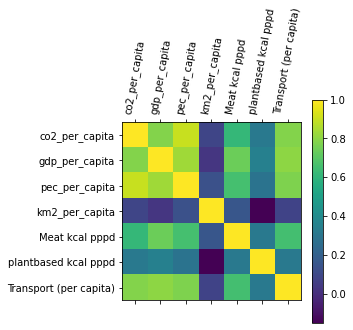

In [ ]:
plt.matshow(df11)
plt.xticks(range(df11.select_dtypes(['number']).shape[1]), df11.select_dtypes(['number']).columns, fontsize=10, rotation=80)
plt.yticks(range(df11.select_dtypes(['number']).shape[1]), df11.select_dtypes(['number']).columns, fontsize=10)
figure = plt.colorbar()
figure.ax.tick_params(labelsize=10)
plt.show()

Conclusie: de hoeveelheid CO2 per capita die er voor transport vrijkomt lijkt een goede voorspeller van de hoeveelheid CO2 die een land per capita uitstoot, net als de hoeveelheid hoeveelheid primaire energie die er per capita gebruikt wordt. Ook blijkt er een relatie te zijn tussen hoeveel kcal uit vlees er geconsumeerd worden en de hoeveelheid CO2 per capita in een land. 

## Vraag 2

In [ ]:
df20 = pd.read_csv('/content/drive/MyDrive/owid-co2-data.csv') # df met info over co2 per capita en per jaar
df20.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1949,AFG,7624058.0,NaN,NaN,NaN,0.015,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1950,AFG,7752117.0,9.421400e+09,NaN,NaN,0.084,0.070,475.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1951,AFG,7840151.0,9.692280e+09,NaN,NaN,0.092,0.007,8.7,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1952,AFG,7935996.0,1.001733e+10,NaN,NaN,0.092,0.000,0.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1953,AFG,8039684.0,1.063052e+10,NaN,NaN,0.106,0.015,16.0,...,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df20.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'methane', 'methane_per_capita', 'nitrous_oxide',
       'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita',
       'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_glo

In [ ]:
df21=df20[['country', 'year', 'co2_per_capita']].set_index('year') 
df21.head()

,country,co2_per_capita
year,,
1949,Afghanistan,0.002
1950,Afghanistan,0.011
1951,Afghanistan,0.012
1952,Afghanistan,0.012
1953,Afghanistan,0.013


In [ ]:
df22 = df21.loc[[2000, 2020]].dropna() # ik wil de toe- of afname tussen 2000 en 2020 bekijken. Meteen ook alle null-waarden verwijderd
df22.head()

,country,co2_per_capita
year,,
2000,Afghanistan,0.036
2000,Africa,1.094
2000,Albania,0.960
2000,Algeria,2.649
2000,Andorra,8.013


In [ ]:
df23 = df22.reset_index()
df24 = df23.pivot(index='country', columns='year', values='co2_per_capita') 
df24.head()

year,2000,2020
country,,
Afghanistan,0.036,0.312
Africa,1.094,0.990
Albania,0.960,1.576
Algeria,2.649,3.535
Andorra,8.013,6.035


In [ ]:
df24['change'] = (df24[2020]-df24[2000])/df24[2000]*(-100)  # % verandering tussen 2000 en 2020
df24.sort_values('change').tail(10) # top 10 van grootste CO2 afname per hoofd van de bevolking.

year,2000,2020,change
country,,,
Gabon,3.801,1.931,49.197580
United Kingdom,9.633,4.855,49.600332
Venezuela,6.278,2.975,52.612297
Denmark,10.165,4.522,55.514019
United Arab Emirates,35.668,15.193,57.404396
Yemen,0.831,0.327,60.649819
North Korea,3.016,1.137,62.301061
Aruba,26.170,7.055,73.041651
Timor,NaN,0.399,NaN


In [ ]:
df24=df24.dropna()

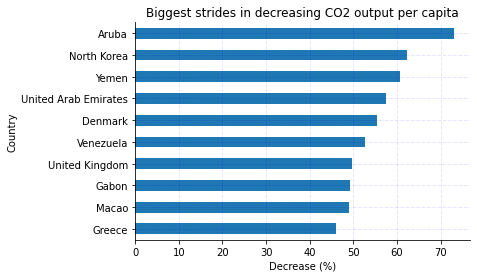

In [ ]:
ax = df24.sort_values('change').tail(10).change.plot.barh(title='Biggest strides in decreasing CO2 output per capita')
plt.xlabel("Decrease (%)")
plt.ylabel("Country")
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)
    ax.grid(b = True, color ='blue',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.show()

# Vraag 3


In [ ]:
df40 = pd.read_csv('/content/drive/MyDrive/levelized-cost-of-energy.csv') # df met info over prijs van energie
df40.head()

,Entity,Code,Year,CSP LCOE (2019 USD/kWh),Hydro LCOE (2019 USD/kWh),Solar LCOE (2019 USD/kWh),Onshore wind LCOE (2019 USD/kWh),Bioenergy LCOE (2019 USD/kWh),Geothermal LCOE (2019 USD/kWh),Offshore wind LCOE (2019 USD/kWh)
0,Brazil,BRA,1998,NaN,NaN,NaN,0.069,NaN,NaN,NaN
1,Brazil,BRA,2001,NaN,NaN,NaN,0.149,NaN,NaN,NaN
2,Brazil,BRA,2002,NaN,NaN,NaN,0.129,NaN,NaN,NaN
3,Brazil,BRA,2003,NaN,NaN,NaN,0.145,NaN,NaN,NaN
4,Brazil,BRA,2005,NaN,NaN,NaN,0.137,NaN,NaN,NaN


In [ ]:
df40.columns

Index(['Entity', 'Code', 'Year', 'CSP LCOE (2019 USD/kWh)',
       'Hydro LCOE (2019 USD/kWh)', 'Solar LCOE (2019 USD/kWh)',
       'Onshore wind LCOE (2019 USD/kWh)', 'Bioenergy LCOE (2019 USD/kWh)',
       'Geothermal LCOE (2019 USD/kWh)', 'Offshore wind LCOE (2019 USD/kWh)'],
      dtype='object')

In [ ]:
df40=df40.rename(columns={'CSP LCOE (2019 USD/kWh)' : 'CSP', 
       'Hydro LCOE (2019 USD/kWh)' : 'hydro', 'Solar LCOE (2019 USD/kWh)': 'solar',
       'Onshore wind LCOE (2019 USD/kWh)': 'onshore_wind', 'Bioenergy LCOE (2019 USD/kWh)': 'bioenergy',
       'Geothermal LCOE (2019 USD/kWh)': 'geothermal', 'Offshore wind LCOE (2019 USD/kWh)': 'offshore_wind'}) # kolomnamen korter

In [ ]:
df40 = df40[df40['Entity'].str.contains("World")==True] # ik ga alleen de gegevens van world gebruiken
df40.head()

,Entity,Code,Year,CSP,hydro,solar,onshore_wind,bioenergy,geothermal,offshore_wind
376,World,OWID_WRL,2010,0.3462,0.037103,0.3783,0.086,0.075597,0.048786,0.161
377,World,OWID_WRL,2011,0.3484,0.035594,0.2863,0.083,0.055425,NaN,0.175
378,World,OWID_WRL,2012,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
379,World,OWID_WRL,2013,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
380,World,OWID_WRL,2014,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183


In [ ]:
df40 = df40.loc[df40['Year'] > 2009] # omdat pas vanaf 2010 er info is van alle soorten energie verwijder ik de oudere data
df40

,Entity,Code,Year,CSP,hydro,solar,onshore_wind,bioenergy,geothermal,offshore_wind
376,World,OWID_WRL,2010,0.3462,0.037103,0.3783,0.086,0.075597,0.048786,0.161
377,World,OWID_WRL,2011,0.3484,0.035594,0.2863,0.083,0.055425,NaN,0.175
378,World,OWID_WRL,2012,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
379,World,OWID_WRL,2013,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
380,World,OWID_WRL,2014,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183
381,World,OWID_WRL,2015,0.2508,0.039014,0.1264,0.069,0.073028,0.060107,0.169
382,World,OWID_WRL,2016,0.2903,0.052220,0.1139,0.066,0.071932,0.069951,0.146
383,World,OWID_WRL,2017,0.2533,0.055025,0.0924,0.064,0.072432,0.074109,0.131
384,World,OWID_WRL,2018,0.1844,0.044514,0.0787,0.058,0.056632,0.070282,0.127
385,World,OWID_WRL,2019,0.1823,0.047287,0.0684,0.053,0.065647,0.071860,0.115


Om linear regression toe te kunnen passen is het van belang dat er geen missing values in de dataset zitten. Daarom wordt NaN vervangen door het gemiddelde uit de kolom geothermal

In [ ]:
df41 = df40.drop(columns=['Entity','Code']) # bij SimpleImputer kan je alleen numerieke inputwaarden checken/vervangen, 
df41                                        # daarom worden de kolommen Entity en code verwijderd omdat deze verder toch niet meer nodig zijn


,Year,CSP,hydro,solar,onshore_wind,bioenergy,geothermal,offshore_wind
376,2010,0.3462,0.037103,0.3783,0.086,0.075597,0.048786,0.161
377,2011,0.3484,0.035594,0.2863,0.083,0.055425,NaN,0.175
378,2012,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
379,2013,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
380,2014,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183
381,2015,0.2508,0.039014,0.1264,0.069,0.073028,0.060107,0.169
382,2016,0.2903,0.052220,0.1139,0.066,0.071932,0.069951,0.146
383,2017,0.2533,0.055025,0.0924,0.064,0.072432,0.074109,0.131
384,2018,0.1844,0.044514,0.0787,0.058,0.056632,0.070282,0.127
385,2019,0.1823,0.047287,0.0684,0.053,0.065647,0.071860,0.115


In [ ]:
imputer = SimpleImputer(fill_value=np.nan, strategy='mean')
X = imputer.fit_transform(df41)

In [ ]:
df42 = pd.DataFrame(X, columns=df41.columns) # weer omzetten naar df, de df is nu helemaal klaar
df42

,Year,CSP,hydro,solar,onshore_wind,bioenergy,geothermal,offshore_wind
0,2010.0,0.3462,0.037103,0.3783,0.086,0.075597,0.048786,0.161
1,2011.0,0.3484,0.035594,0.2863,0.083,0.055425,0.067193,0.175
2,2012.0,0.3525,0.037753,0.2225,0.083,0.060869,0.084536,0.154
3,2013.0,0.2681,0.042926,0.1751,0.082,0.081262,0.061515,0.177
4,2014.0,0.2432,0.043932,0.1636,0.076,0.082069,0.063591,0.183
5,2015.0,0.2508,0.039014,0.1264,0.069,0.073028,0.060107,0.169
6,2016.0,0.2903,0.052220,0.1139,0.066,0.071932,0.069951,0.146
7,2017.0,0.2533,0.055025,0.0924,0.064,0.072432,0.074109,0.131
8,2018.0,0.1844,0.044514,0.0787,0.058,0.056632,0.070282,0.127
9,2019.0,0.1823,0.047287,0.0684,0.053,0.065647,0.071860,0.115


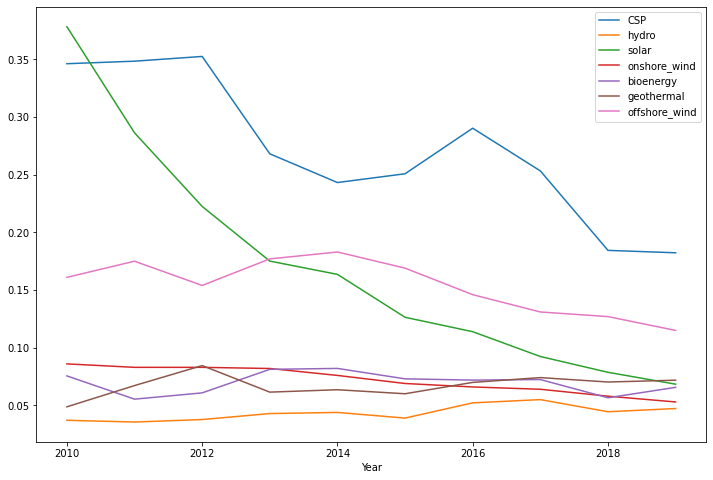

In [ ]:
 df42.plot(x="Year", y=['CSP', 'hydro', 'solar', 'onshore_wind', 'bioenergy', 'geothermal', 'offshore_wind'], kind='line', figsize=(12,8))

# Lineair regression

In [ ]:
x = df42['Year']   # x=target
y = df42['CSP']    # y-target
CSP = df42['CSP']
hydro = df42['hydro']
solar = df42['solar']
onshore_wind = df42['onshore_wind']
bioenergy = df42['bioenergy']
geothermal = df42['geothermal']
offshore_wind = df42['offshore_wind']

In [ ]:
slope_intercept = np.polyfit(x,y,1)

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, y) 

In [ ]:
def myfunc(x):                    # Maak een functie die de slope- en interceptwaarden gebruikt om een nieuwe waarde te retourneren (formule voor de lineair regression lijn)
  return slope * x + intercept

In [ ]:
mymodel = list(map(myfunc, x))   # geeft de lineair regression line

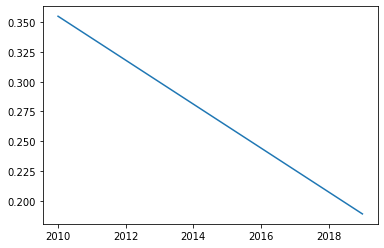

In [ ]:
plt.plot(x, mymodel) # linear regression lijn voor de gemeten waarden

In [ ]:
extended_x = [x for x in range(2019, 2031)] # toegevoegd, jaartallen waarvoor ik wil voorspellen

#CSP

In [ ]:
slope_intercept = np.polyfit(x,CSP,1)

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, CSP) 

In [ ]:
def myfunc_CSP(extended_x):                    
  return slope * extended_x + intercept

In [ ]:
mymodel_CSP = list(map(myfunc_CSP, extended_x))

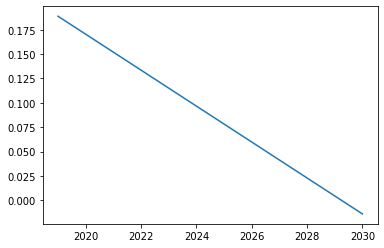

In [ ]:
plt.plot(extended_x, mymodel_CSP)

#hydro

In [ ]:
slope_intercept = np.polyfit(x,hydro,1)

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, hydro) 

In [ ]:
def myfunc_hydro(extended_x):                    
  return slope * extended_x + intercept

In [ ]:
mymodel_hydro = list(map(myfunc_hydro, extended_x))

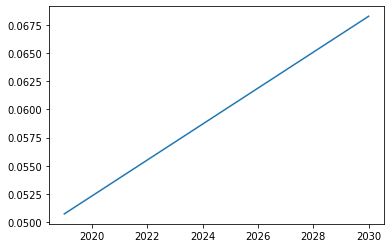

In [ ]:
plt.plot(extended_x, mymodel_hydro)

#solar

In [ ]:
slope_intercept = np.polyfit(x,solar,1)

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, solar) 

In [ ]:
def myfunc_solar(extended_x):                    
  return slope * extended_x + intercept

In [ ]:
mymodel_solar = list(map(myfunc_solar, extended_x))

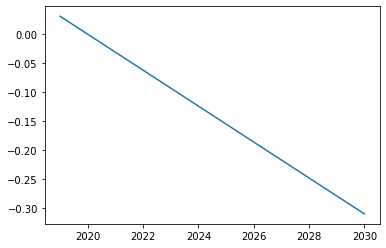

In [ ]:
plt.plot(extended_x, mymodel_solar)

#onshore_wind

In [ ]:
slope_intercept = np.polyfit(x,onshore_wind,1)

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, onshore_wind) 

In [ ]:
def myfunc_onshore_wind(extended_x):                    
  return slope * extended_x + intercept

In [ ]:
mymodel_onshore_wind = list(map(myfunc_onshore_wind, extended_x))

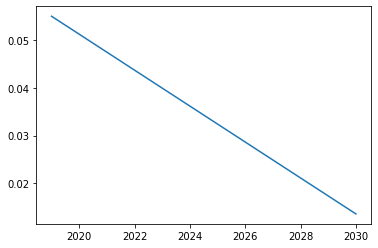

In [ ]:
plt.plot(extended_x, mymodel_onshore_wind)

#bioenergy

In [ ]:
slope_intercept = np.polyfit(x,bioenergy,1)

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, bioenergy) 

In [ ]:
def myfunc_bioenergy(extended_x):                    
  return slope * extended_x + intercept

In [ ]:
mymodel_bioenergy = list(map(myfunc_bioenergy, extended_x))

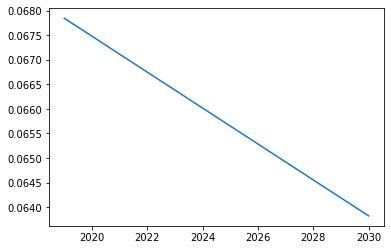

In [ ]:
plt.plot(extended_x, mymodel_bioenergy)

#geothermal

In [ ]:
slope_intercept = np.polyfit(x,geothermal,1)

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, geothermal) 

In [ ]:
def myfunc_geothermal(extended_x):                    
  return slope * extended_x + intercept

In [ ]:
mymodel_geothermal = list(map(myfunc_geothermal, extended_x))

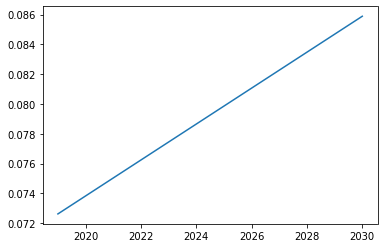

In [ ]:
plt.plot(extended_x, mymodel_geothermal)

#offshore_wind

In [ ]:
slope_intercept = np.polyfit(x,offshore_wind,1)

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, offshore_wind) 

In [ ]:
def myfunc_offshore_wind(extended_x):                    
  return slope * extended_x + intercept

In [ ]:
mymodel_offshore_wind = list(map(myfunc_offshore_wind, extended_x))

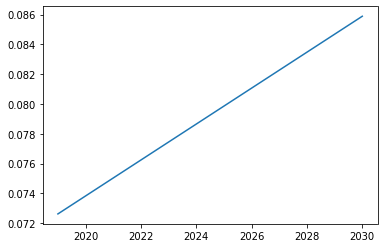

In [ ]:
plt.plot(extended_x, mymodel_geothermal)

# grafiek

Text(0.5, 1.0, 'current pricing of non-fossil energy sources')

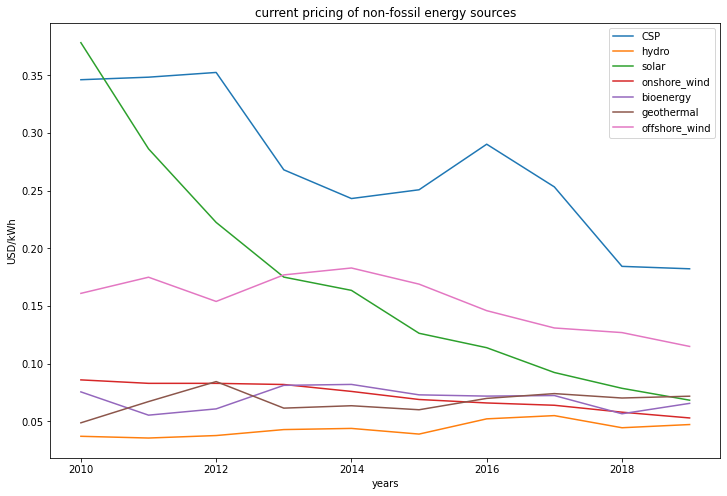

In [ ]:
df42.plot(x="Year", y=['CSP', 'hydro', 'solar', 'onshore_wind', 'bioenergy', 'geothermal', 'offshore_wind'], figsize=(12,8))
plt.xlabel("years")
plt.ylabel("USD/kWh")
plt.title("current pricing of non-fossil energy sources")

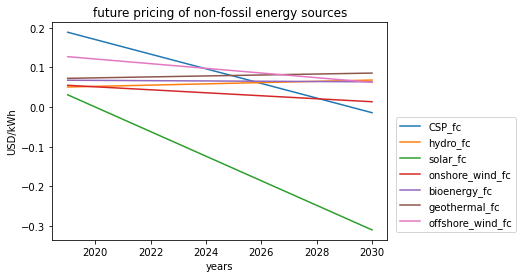

In [ ]:
plt.plot(extended_x, mymodel_CSP, label = "CSP_fc")
plt.plot(extended_x, mymodel_hydro, label = "hydro_fc")
plt.plot(extended_x, mymodel_solar, label = "solar_fc")
plt.plot(extended_x, mymodel_onshore_wind, label = "onshore_wind_fc")
plt.plot(extended_x, mymodel_bioenergy, label = "bioenergy_fc")
plt.plot(extended_x, mymodel_geothermal, label = "geothermal_fc")
plt.plot(extended_x, mymodel_offshore_wind, label = "offshore_wind_fc")
plt.legend(loc='center right', bbox_to_anchor=(1.4, 0.3))
plt.xlabel("years")
plt.ylabel("USD/kWh")
plt.title("future pricing of non-fossil energy sources")
plt.show()